<a href="https://colab.research.google.com/github/rostydovga/DataIntensiveElaborato/blob/main/Comapny_Bankruptcy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determinare se una società è in rischio di Bancarotta
**Programmazione di Applicazioni Data Intensive**
Anno 2021/2022

Dovganyuk Rostyslav

## Descrizione del Problema ed Analisi Esplorativa

Utilizziamo un Dataset contenente tutte le informazioni relative ad Aziende polacche che sono andate in Bancarotta e non.

Creeremo diversi modelli di classificazione che addestreremo sul dataset corrente (https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data), che dovranno occuparsi di predire se l'azienda è a rischio bancarotta o meno

### Import Librerie necessarie

In [1387]:
import os.path
import os
import numpy as np
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from urllib.request import urlretrieve
from zipfile import ZipFile

### Caricamento dei dati

In [1388]:
file_zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00365/data.zip'
file_zip_name = 'data.zip'

if not os.path.exists(file_zip_name):
  urlretrieve(file_zip_url, file_zip_name)
  with ZipFile(file_zip_name) as f:
    f.extractall()

In [1389]:
file_list = ['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

In [1390]:
list_df = []
for f in file_list:
  with open(f) as dataFile:
    data = arff.loadarff(dataFile)
    d = pd.DataFrame(data[0])
    print(f'File {f} have shape: {d.shape}')
    list_df.append(d)    
# concateno il tutto in un unico dataframe
df = pd.concat(list_df) 

File 1year.arff have shape: (7027, 65)
File 2year.arff have shape: (10173, 65)
File 3year.arff have shape: (10503, 65)
File 4year.arff have shape: (9792, 65)
File 5year.arff have shape: (5910, 65)


In [1391]:
df.shape

(43405, 65)

modifico gli indici per l'intero dataframe

In [1392]:
df.index = range(df.shape[0])

In [1393]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


- L'ultima colonna `class` rappresenta la classe di appartenenza della società
- Le altre 64 colonne invece sono le principali variabili di analisi di un'azienda, per comodità le rinomineremo con X1 ... X64



#### Significato delle colonne di analisi

`X1` - net profit / total assets

`X2` - total liabilities / total assets

`X3` working capital / total assets

`X4` - current assets / short-term liabilities

`X5` - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

`X6` - retained earnings / total assets

`X7` - EBIT / total assets

`X8` - book value of equity / total liabilities

`X9` - sales / total assets

`X10` -  equity / total assets

`X11` -  (gross profit + extraordinary items + financial expenses) / total assets

`X12` -  gross profit / short-term liabilities

`X13` -  (gross profit + depreciation) / sales

`X14` -  (gross profit + interest) / total assets

`X15` -  (total liabilities * 365) / (gross profit + depreciation)

`X16` -  (gross profit + depreciation) / total liabilities

`X17` -  total assets / total liabilities

`X18` -  gross profit / total assets

`X19` -  gross profit / sales

`X20` -  (inventory * 365) / sales

`X21` - sales (n) / sales (n-1)

`X22` - profit on operating activities / total assets

`X23` - net profit / sales

`X24` - gross profit (in 3 years) / total assets

`X25` - (equity - share capital) / total assets

`X26` - (net profit + depreciation) / total liabilities

`X27` - profit on operating activities / financial expenses

`X28` - working capital / fixed assets

`X29` - logarithm of total assets

`X30` - (total liabilities - cash) / sales

`X31` - (gross profit + interest) / sales

`X32` - (current liabilities * 365) / cost of products sold

`X33` - operating expenses / short-term liabilities

`X34` - operating expenses / total liabilities

`X35` - profit on sales / total asset
s

`X36` - total sales / total assets

`X37` - (current assets - inventories) / long-term liabilities

`X38` - constant capital / total assets

`X39` - profit on sales / sales

`X40` - (current assets - inventory - receivables) / short-term liabilities

`X41` - total liabilities / ((profit on operating activities + depreciation) * (12/365))

`X42` - profit on operating activities / sales

`X43` - rotation receivables + inventory turnover in days

`X44` - (receivables * 365) / sales

`X45` - net profit / inventory

`X46` - (current assets - inventory) / short-term liabilities

`X47` - (inventory * 365) / cost of products sold

`X48` - EBITDA (profit on operating activities - depreciation) / total assets

`X49` - EBITDA (profit on operating activities - depreciation) / sales

`X50` - current assets / total liabilities

`X51` - short-term liabilities / total assets

`X52` - (short-term liabilities * 365) / cost of products sold)

`X53` - equity / fixed assets

`X54` - constant capital / fixed assets

`X55` - working capital

`X56` - (sales - cost of products sold) / sales

`X57` - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

`X58` - total costs /total sales

`X59` - long-term liabilities / equity

`X60` - sales / inventory

`X61` - sales / receivables

`X62` - (short-term liabilities *365) / sales

`X63` - sales / short-term liabilities

`X64` - sales / fixed assets

### Rinominiamo le colonne

In [1394]:
columns_names = [f'X{i}' for i in range(1, df.shape[1])]
columns_names.append('Bankrupt')

In [1395]:
df.columns = columns_names

In [1396]:
df['Bankrupt'] = pd.to_numeric(df['Bankrupt'])

In [1397]:
df.tail(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
43395,0.361470,0.25590,0.562760,9.75930,205.980,-0.325970,0.516340,2.907000,0.59282,0.743910,...,-0.155780,0.485910,0.57244,0.000000,3.3617,8.7628,39.557,9.2272,1.59020,1
43396,-0.084381,0.22485,0.097051,1.43160,-119.220,-0.084381,-0.084381,2.741800,0.76553,0.616500,...,-0.306280,-0.136870,1.30630,0.000000,1.7854,8.8316,226.370,1.6124,0.53491,1
43397,0.059436,0.54161,0.376720,2.01920,26.665,-0.275010,0.059436,0.846500,2.26430,0.458470,...,0.170090,0.129640,0.82727,0.375110,10.6280,4.3093,59.584,6.1258,8.93020,1
43398,-0.076836,0.51194,0.196600,1.38590,-133.380,-0.076836,-0.074938,-0.245900,1.03000,-0.125890,...,0.029134,0.610360,0.97087,-0.020175,1.9645,21.3700,155.100,2.3534,4.07770,1
43399,-0.283380,0.97794,-0.125140,0.64902,-56.126,-1.329800,-0.283380,0.022514,1.39430,0.022018,...,0.032555,-12.871000,0.97208,24.893000,9.8129,16.6910,93.338,3.9105,1.81430,1
43400,0.012898,0.70621,0.038857,1.17220,-18.907,0.000000,0.013981,0.416000,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43401,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.578050,-0.578050,-0.403340,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43402,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.179050,-0.154930,-0.260180,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43403,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.108860,-0.109180,0.125310,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1
43404,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.105370,-0.109940,0.864600,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,1


### Aggiungiamo la colonna Z-score
Z-score, o anche chiamato indice Altman che permette di identificare una società che è in rischio bancarotta.

Se Z-score < 1.8 significa che l'azienda è in probabile bancarotta. Gli investitori usano questo indice per determinare la solidità finanziaria dell'azienda.

L'indice si basa su 5 variabili fondamentali:
- A = working capital / total assets (`X3`)
- B = retained earnings / total assets (`X6`)
- C = earnings before interest and tax / total assets (`X7`)
- D = market value of equity / total liabilities (`X8`)
- E = sales / total assets (`X9`)

Calcolo Z-score:

$Z$-$score = 1.2A + 1.4B + 3.3C +0.6D + 1.0E $




In [1398]:
def z_score(A, B, C, D, E):
  return (1.2*A) + (1.4*B) + (3.3*C) + (0.6*D) + (1.0*E)

In [1399]:
A_df = df['X3']
B_df = df['X6']
C_df = df['X7']
D_df = df['X8']
E_df = df['X9']

In [1400]:
df['z-score'] = z_score(A_df, B_df, C_df, D_df, E_df)

In [1401]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,z-score
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,3.780650
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,3.716428
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,2.911624
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,3.243063
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,2.690244


Visualizzo il numero di Aziende che sono andate in bancarotta con `z-score < 1.8`

In [1402]:
df.loc[df['z-score']<1.8]['Bankrupt'].value_counts()

0    9470
1    1017
Name: Bankrupt, dtype: int64

### Analisi del DataFrame

Come prima cosa analizziamo la distribuzione di `Bankrupt`

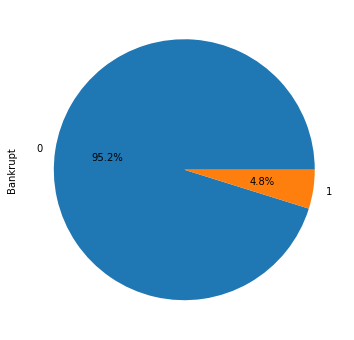

In [1403]:
df['Bankrupt'].value_counts().plot.pie(autopct='%1.1f%%' ,figsize=(6,6))

In [1404]:
df['Bankrupt'].value_counts()

0    41314
1     2091
Name: Bankrupt, dtype: int64

Notiamo subito un forte sbilanciamento a favore dello zero, prima di andare ad equilibrare il tutto valutiamo le variabili nulle presenti nel dataframe

In [1405]:
df.isna().sum().sort_values().tail(10)

X53      812
X28      812
X64      812
X54      812
X24      922
X45     2147
X60     2152
X27     2764
X21     5854
X37    18984
dtype: int64

In [1406]:
columns_nan = df.isna().sum().sort_values().tail(5).index

In [1407]:
print(f"Variabili NaN in Bankrupt==1:  \n{df.loc[df['Bankrupt']==1].isna().sum().sort_values().tail(10)}\n")
print(f"Variabili NaN in Bankrupt==0:  \n{df.loc[df['Bankrupt']==0].isna().sum().sort_values().tail(10)}")

Variabili NaN in Bankrupt==1:  
X11     37
X53     80
X54     80
X28     80
X64     80
X45    176
X60    176
X21    615
X27    715
X37    977
dtype: int64

Variabili NaN in Bankrupt==0:  
X28      732
X54      732
X53      732
X41      754
X24      921
X45     1971
X60     1976
X27     2049
X21     5239
X37    18007
dtype: int64


Notiamo che il numero di elementi nulli è davvero elevato, sopprattuto per la colonna `X37` - ***(current assets - inventories) / long-term liabilities***

Valutiamo ora se eseguendo il `drop` delle righe nulle avremo comunque un elevato numero di dati su cui lavorare, oppure se possiamo eliminare direttamente la colonna

Quali sarebbero le cardinalità se:

In [1408]:
df.shape

(43405, 66)

Eliminassi le righe NaN

In [1409]:
df_drop_rows = df.dropna()
df_drop_rows.shape

(19967, 66)

Eliminassi la colonna X37

In [1410]:
df_drop_columns = df.drop(columns=['X37'])
df_drop_columns.dropna(inplace=True)
df_drop_columns.shape

(32607, 65)

eliminassi le 5 colonne col maggior numero di NaN

In [1411]:
df_drop_major_columns = df.drop(columns=columns_nan)
df_drop_major_columns.dropna(inplace=True)
df_drop_major_columns.shape

(40506, 61)

Ora vediamo la distribuzione di `Bankrupt`

In [1412]:
df_statistics = pd.DataFrame(index=['With Nan', 'drop Nan rows', 'drop column X37 & Nan rows', 'drop major columns & Nan rows'] ,data=[df['Bankrupt'].value_counts(), df_drop_rows['Bankrupt'].value_counts(), df_drop_columns['Bankrupt'].value_counts(), df_drop_major_columns['Bankrupt'].value_counts()])
df_statistics['percentage'] = (df_statistics[1]/df_statistics[0])*100
df_statistics

,0,1,percentage
With Nan,41314,2091,5.061238
drop Nan rows,19535,432,2.211415
drop column X37 & Nan rows,31846,761,2.389625
drop major columns & Nan rows,38554,1952,5.063028


Text(0.5, 1.0, 'Drop major columns and Nan rows')

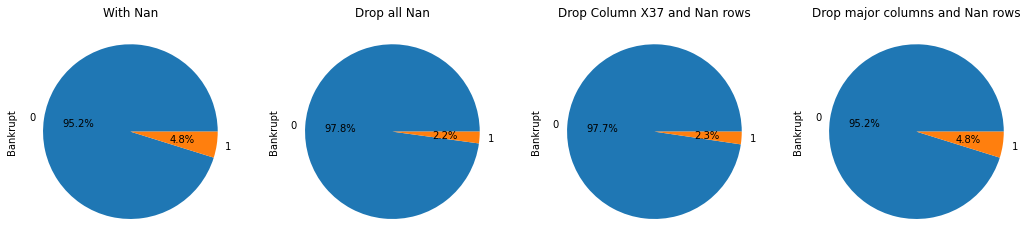

In [1413]:
plt.figure(figsize=(18,8))

pie_1 = plt.subplot(1,4,1)
pie_1 = df['Bankrupt'].value_counts().plot.pie(autopct='%1.1f%%' )
pie_1.set_title('With Nan')

pie_2 = plt.subplot(1,4,2)
pie_2 = df_drop_rows['Bankrupt'].value_counts().plot.pie(autopct='%1.1f%%' )
pie_2.set_title('Drop all Nan')

pie_3 = plt.subplot(1,4,3)
pie_3 = df_drop_columns['Bankrupt'].value_counts().plot.pie(autopct='%1.1f%%' )
pie_3.set_title('Drop Column X37 and Nan rows')

pie_4 = plt.subplot(1,4,4)
pie_3 = df_drop_major_columns['Bankrupt'].value_counts().plot.pie(autopct='%1.1f%%' )
pie_3.set_title('Drop major columns and Nan rows')

Da quest'analisi notiamo che eliminando le colonne col maggior numero di valori nulli e successivamente le righe nulle, la percentuale di valori in `Bankrupt` rimane la stessa

In [1414]:
df.drop(columns=columns_nan, inplace=True)
df.dropna(inplace=True)

In [1415]:
df.shape

(40506, 61)

In [1416]:
corr = df.corr()

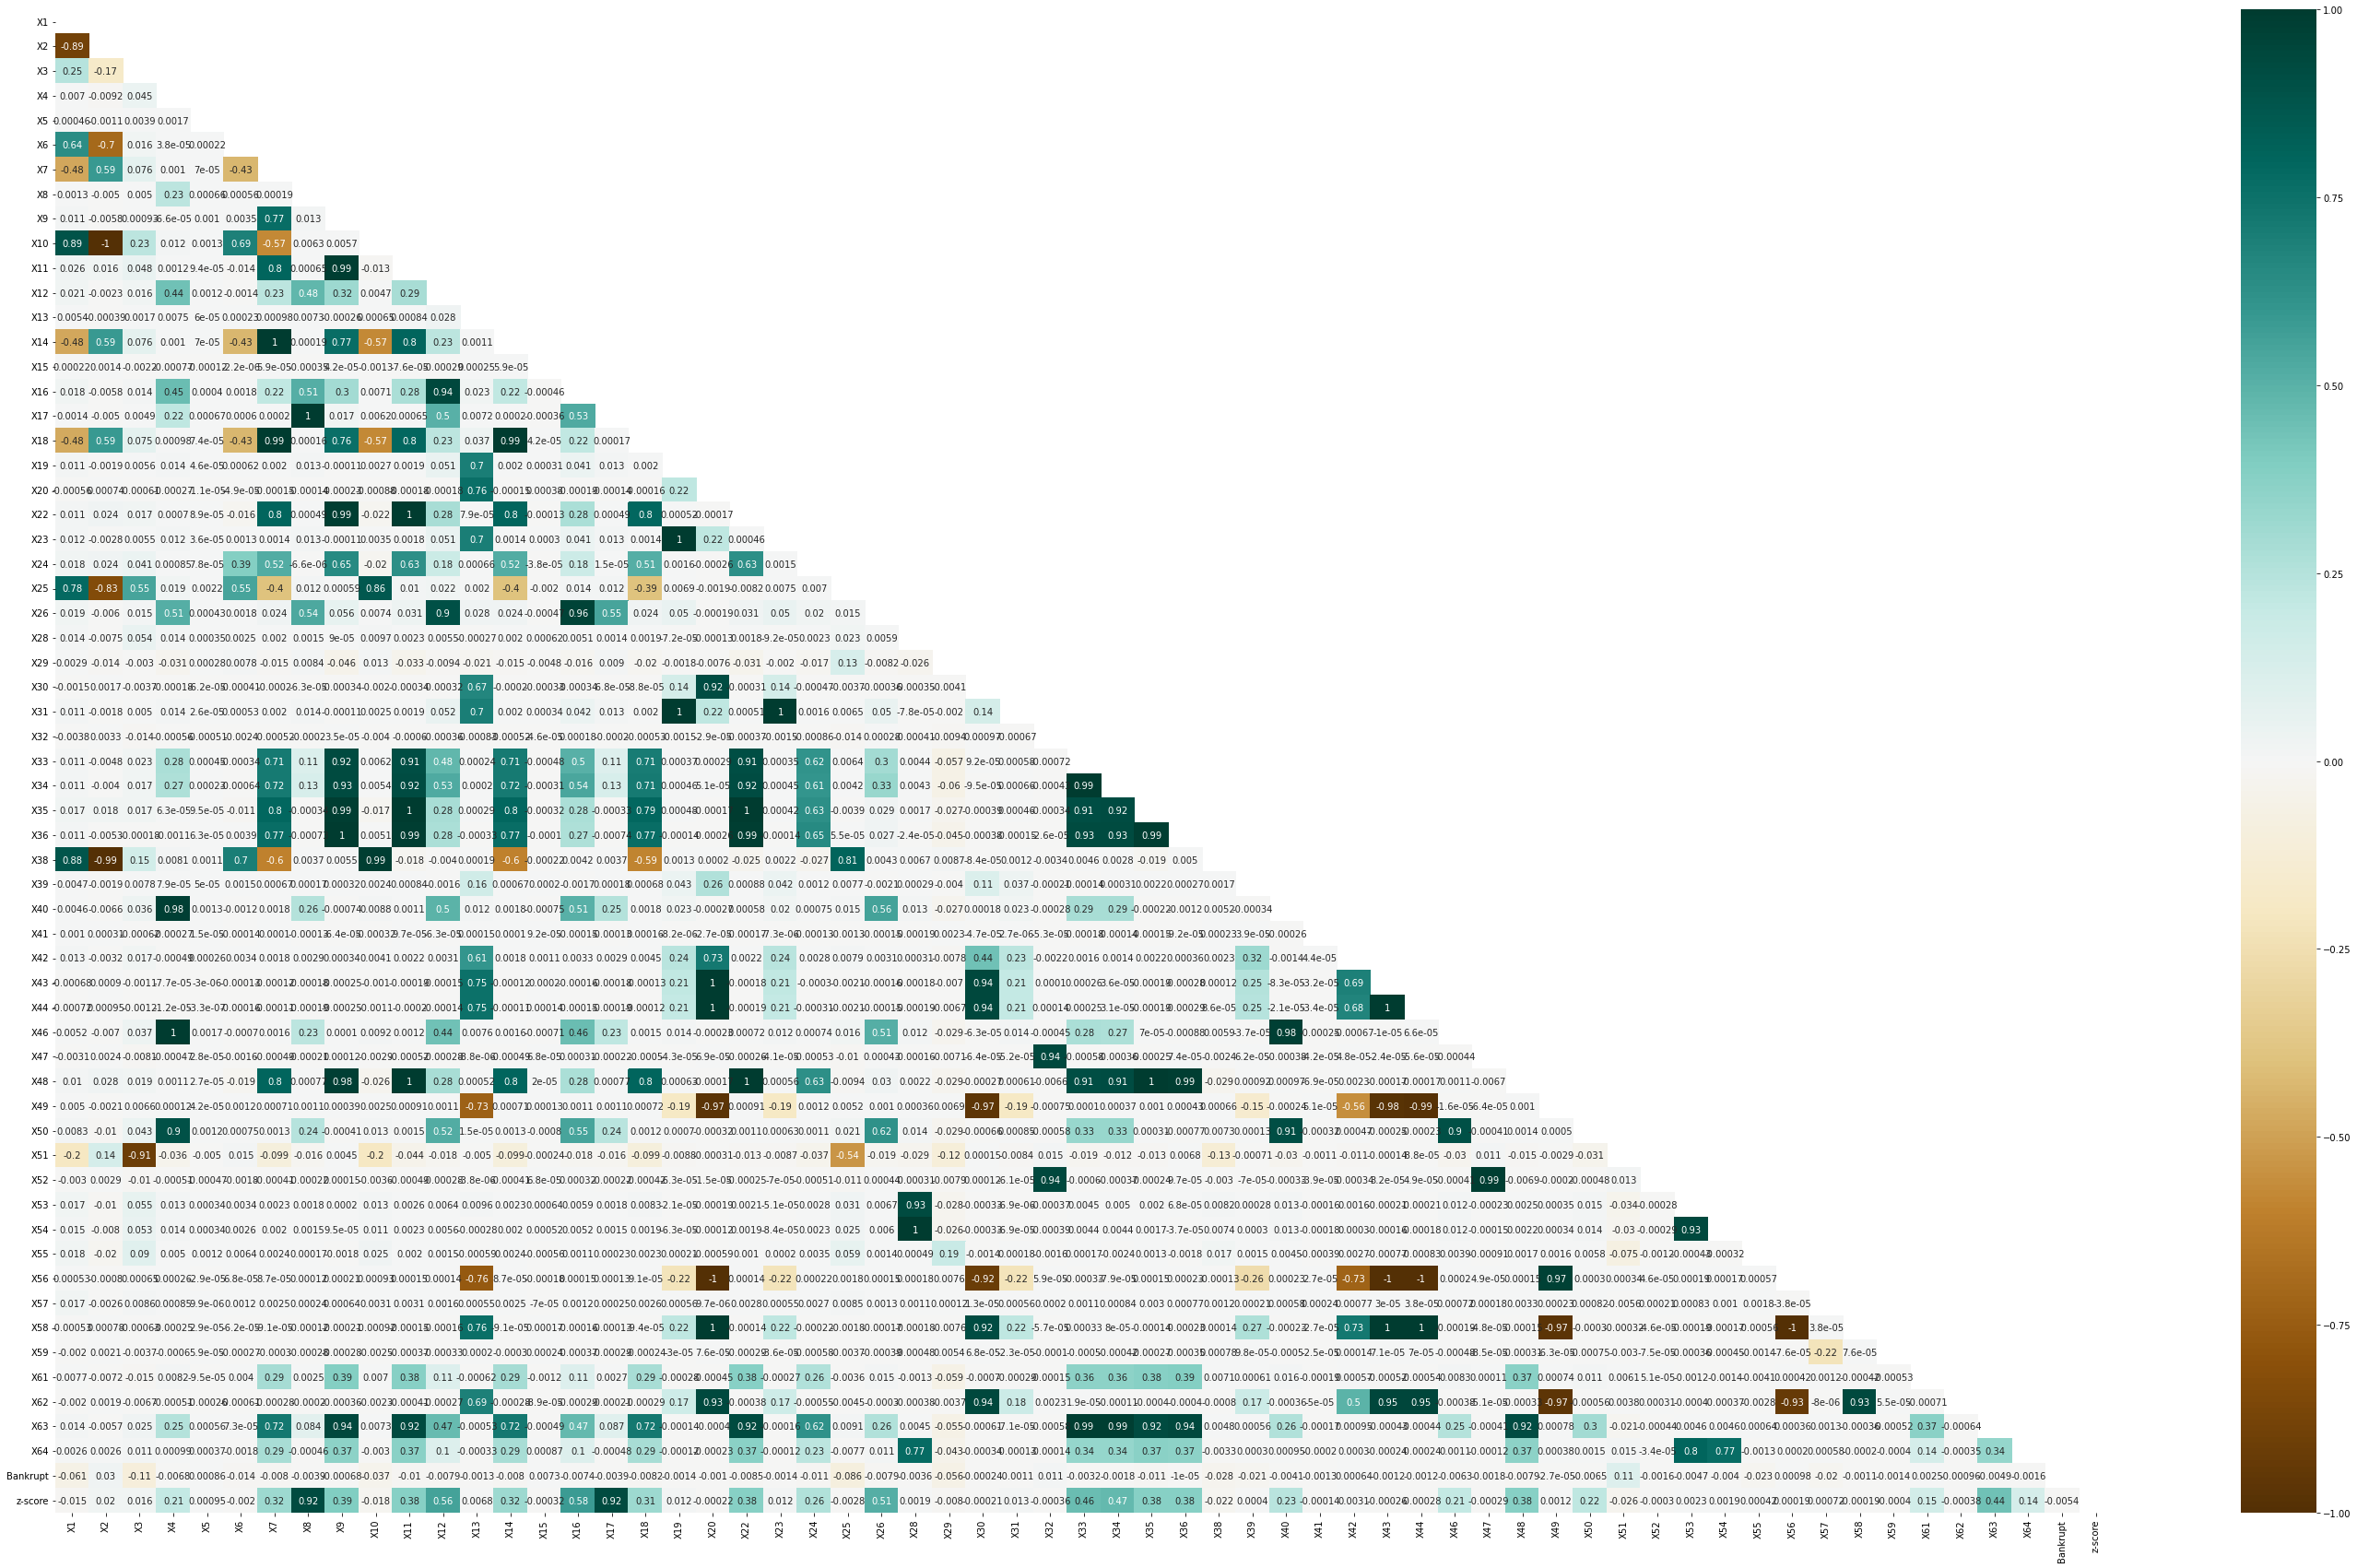

In [1417]:
plt.figure(figsize=(50, 30))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG')

In [1418]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
X1,40506.0,0.063332,0.517663,-3.205200e+01,0.003998,0.049812,0.128258,8.745900e+01
X2,40506.0,0.510174,2.220895,-4.308700e+02,0.273012,0.472790,0.685060,7.241600e+01
X3,40506.0,0.177848,0.561330,-7.206700e+01,0.019969,0.190335,0.390325,9.964000e-01
X4,40506.0,3.576368,44.888262,-4.031100e-01,1.045900,1.552800,2.725875,6.845800e+03
X5,40506.0,-327.989324,61100.322966,-1.190300e+07,-49.442750,-2.123400,48.231500,1.034100e+06


Notiamo che la differenza tra minimo e massimo di alcune variabili è davvero elevata, bisogna tener conto di questo poi nella creazione dei modelli

## Creazione e test modelli

### Gestione delle classi sbilanciate
Prendiamo in considerazione 3 possibilità
- undersampling della classe più numerosa
- oversampling della classe con meno dati (tecnica SMOTE)
- aumentare il peso degli errori sulla classe con meno istanze

### Selezione di solo alcune features

Useremo questo metodo per alcuni modelli, questo perchè oltre ad avere classi sbilanciate e tante feature su cui lavorare, rischiando di arrivare ad un overfitting

In [1419]:
# per ottenere informazioni comuni
from sklearn.feature_selection import mutual_info_classif
# per selezionare le feature
from sklearn.feature_selection import SelectKBest

In [1420]:
X = df.drop(columns=['Bankrupt'])
y = df['Bankrupt']

In [1421]:
mi = mutual_info_classif(df.drop(columns='Bankrupt'), df['Bankrupt'])
mi

array([0.01030252, 0.00866664, 0.00740508, 0.0088    , 0.00725696,
       0.01053907, 0.01012985, 0.00839135, 0.00125507, 0.00880579,
       0.00815779, 0.01047435, 0.0134293 , 0.01053705, 0.01349883,
       0.01394563, 0.00878541, 0.01054281, 0.01153332, 0.00080207,
       0.0138468 , 0.01215978, 0.01512292, 0.01071476, 0.01563519,
       0.00820057, 0.00180162, 0.00506902, 0.00797027, 0.00334027,
       0.00306747, 0.00195454, 0.0106825 , 0.        , 0.01029145,
       0.01123759, 0.00724694, 0.01369022, 0.01493193, 0.00136935,
       0.00077919, 0.01300277, 0.00077801, 0.00322793, 0.00477719,
       0.00613901, 0.00951255, 0.00313047, 0.00693248, 0.00861894,
       0.00568064, 0.00660534, 0.00624291, 0.00771167, 0.00072555,
       0.00079468, 0.00630183, 0.0063783 , 0.00073547, 0.01015922])

Text(0, 0.5, 'Mutual Information')

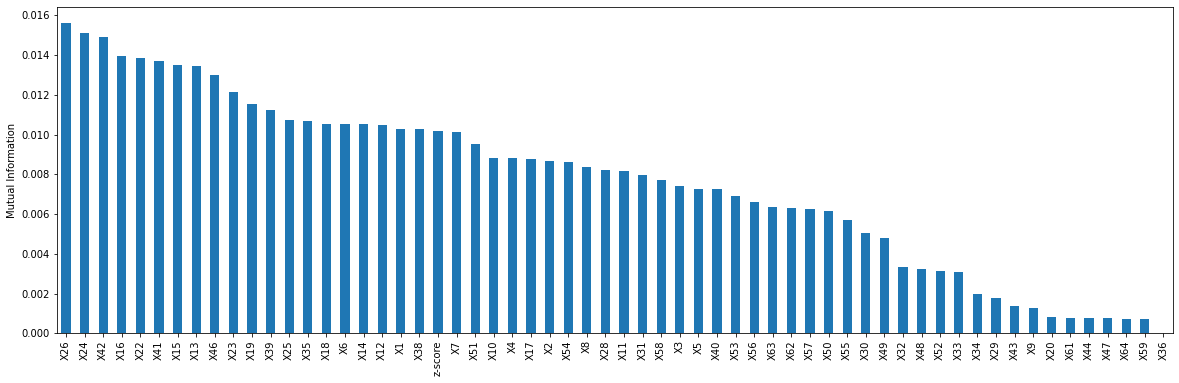

In [1422]:
mi = pd.Series(mi)
mi.index = df.drop(columns='Bankrupt').columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

### Funzioni necessarie

Visto che andrò a riusare gli stessi modelli per tutte e 3 le modalità elencate sopra, definisco direttamente qua le funzioni che si occuperanno della creazione del modello, addestramento e valutazione

In [1423]:
# import delle librerie usate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [1424]:
def model_confusion_matrix(model, X_val, y_val):
  '''
  Stampa il dataframe della confusion matrix e mostra la sua rappresentazione grafica
  '''
  print(f'Modello: {model}')
  y_pred = model.predict(X_val)
  cm = confusion_matrix(y_val, y_pred)
  plt.title(f'Confusion Matrix di {model}')
  sns.heatmap(cm,annot=True,fmt="2g", cmap='BrBG')
  plt.show()

In [1425]:
def model_accuracy(model, X_val, y_val):
  '''
  Stampa i principali valori che permettono di capire se un modello è valido o meno
  '''
  y_pred = model.predict(X_val)
  precision_score_ = precision_score(y_val, y_pred, pos_label=1)
  recall_score_ = recall_score(y_val, y_pred, pos_label=1)
  f1_score_ = f1_score(y_val, y_pred, average="macro")
  print(f'Precision Score -> {precision_score_}')
  print(f'Recall Score -> {recall_score_}')
  print(f'F1 Score -> {f1_score_}')

  return precision_score_, recall_score_, f1_score_

In [1426]:
def perceptron_function(X_train, y_train):
  '''
  Funzione che si occupa della creazione e addestramento del modello Perceptron
  Ritorna il modello addestrato sui valori di input dati
  '''
  model = Perceptron(random_state=42)
  model.fit(X_train, y_train)
  return model

In [1427]:
def logistic_regression_function(X_train, y_train, grid=None, class_weight=None):
  '''
  Funzione che ritorna il miglior modello di regressione logistica
  '''
  model = LogisticRegression(solver='saga', random_state=42, class_weight=class_weight)
  if grid != None:
    skf = StratifiedKFold(3, shuffle=True, random_state=42)
    gs = GridSearchCV(model, grid, cv=skf)
    gs.fit(X_train, y_train)
    model = gs.best_estimator_
    print(f'Regressione Logistica -> {model}')
  else :
    model.fit(X_train, y_train)
  

  return model

In [1428]:
def decision_tree_classifier_function(X_train, y_train):
  model = DecisionTreeClassifier(max_depth=2)
  model.fit(X_train, y_train);

In [1429]:
dictdictionary_methods = {}

### 1. Undersampling della classe più numerosa

In [1430]:
list_models_accuracy = []
dictionary_model_accuracy = {}

In [1431]:
num_bankrupt = df.loc[df['Bankrupt']==1].shape[0]

In [1432]:
non_bankrupt_sample = df.loc[df['Bankrupt']==0][:num_bankrupt]
bankrupt_sample = df.loc[df['Bankrupt']==1]
# concateno i 2 dataframe
df_sampled = pd.concat([non_bankrupt_sample, bankrupt_sample], axis=0)

In [1433]:
pd.DataFrame(df_sampled['Bankrupt'].value_counts())

,Bankrupt
0,1952
1,1952


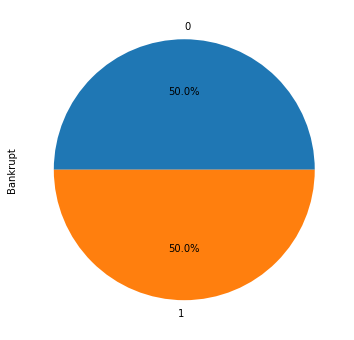

In [1434]:
df_sampled['Bankrupt'].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')

#### Dichiaro le feature e la variabile target

In [1435]:
X_sampled = df_sampled.drop(columns='Bankrupt')
y_sampled = df_sampled['Bankrupt']

#### Split dei dati in training e validation set

In [1436]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_sampled, y_sampled,
    test_size=1/3,  
    random_state=42 
)

#### Creo i Modelli di classificazione

##### Perceptron

In [1437]:
####
mi = mutual_info_classif(X_train, y_train)

sel_ = SelectKBest(mutual_info_classif, k=20).fit(X_train, y_train)

X_train = sel_.transform(X_train)
X_val = sel_.transform(X_val)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
####

Text(0, 0.5, 'Mutual Information')

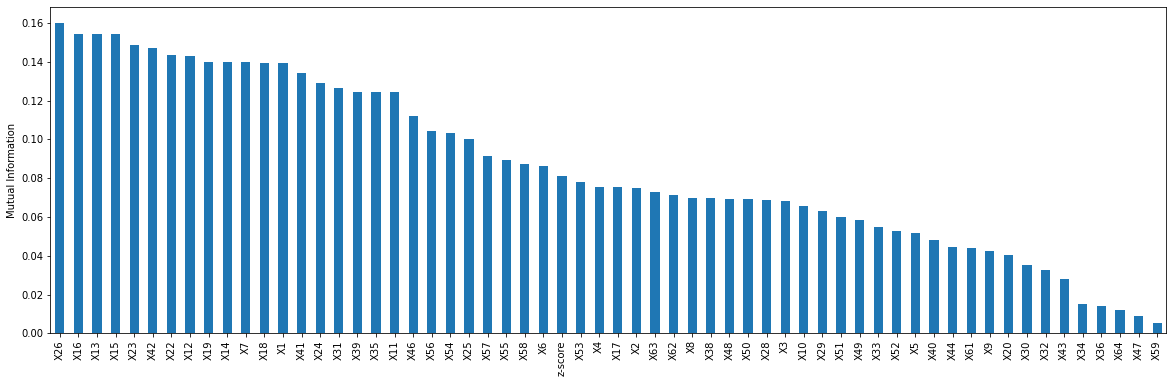

In [1438]:
mi = pd.Series(mi)
mi.index = X_sampled.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [1439]:
model = perceptron_function(X_train, y_train)

In [1440]:
model.score(X_val, y_val)

0.7596006144393241

Il modello classifica correttamente solo il 68% delle istanze del validation set, non un buon risultato

##### Accuratezza del modello

Modello: Perceptron(random_state=42)


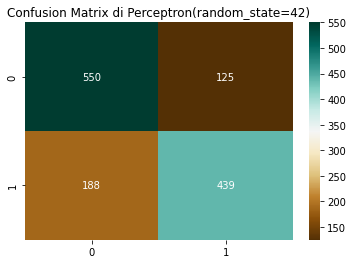

In [1441]:
model_confusion_matrix(model, X_val, y_val)

Notare come il numero di falsi positivi e falsi negativi è molto elevato

In [1442]:
dictionary_model_accuracy = { 'Perceptron' : model_accuracy(model, X_val, y_val)}

Precision Score -> 0.7783687943262412
Recall Score -> 0.7001594896331739
F1 Score -> 0.7578405628911814


In [1443]:
list_models_accuracy.append(dictionary_model_accuracy)

##### Regressione Logistica

addestriamo il modello sui dati già satandardizzati

In [1444]:
model = logistic_regression_function(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [1445]:
model.score(X_val, y_val)

0.6996927803379416

##### Accuratezza del modello

Modello: LogisticRegression(random_state=42, solver='saga')


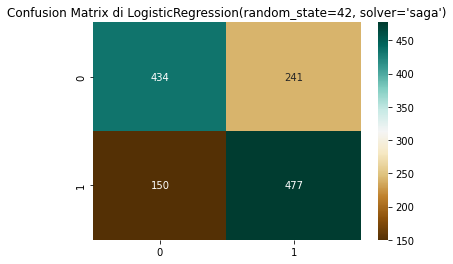

In [1446]:
model_confusion_matrix(model, X_val, y_val)

Il numero di falsi positivi e falsi negativi ora si è bilanciato, diminuendo per i falsi negativi (Perceptron aveva 327, contro l'attuale 185), ma è aumentato il numero di falsi positivi (Perceptron: 85, attuale: 180 )

In [1447]:
dictionary_model_accuracy = { 'Logistic Regression' : model_accuracy(model, X_val, y_val)}

Precision Score -> 0.6643454038997214
Recall Score -> 0.7607655502392344
F1 Score -> 0.6993648703313835


In [1448]:
list_models_accuracy.append(dictionary_model_accuracy)

Eseguiamo la **Regolarizzazione** del modello

Per la regolarizzazione abbiamo diverse possibilità su cui possiamo lavorare, per semplificare il tutto eseguiamo una Grid Search sul modello di Regressione Logistica

Creo la griglia su cui voglio testare il modello
- `penalty` rappresenta la tecninca di regolarizzazione
- `C` regola il peso 
- `l1_ratio` notare che lo usiamo solo con `penalty='elasticnet'` perchè è l'insieme di l1 e l2

In [1449]:
grid = [
    {
        "penalty": ["l2", "l1"],
        "C": [0.1, 1, 10]
    },
    {
        "penalty": ["elasticnet"],
        "C": [0.1, 1, 10],
        "l1_ratio": [0.2, 0.5]
    }
]

In [1450]:
model = logistic_regression_function(X_train, y_train, grid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Regressione Logistica -> LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [1451]:
model

LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')

In [1452]:
model.score(X_val, y_val)

0.6989247311827957

La percentuale è rimasta circa la stessa

Accuratezza del modello

Modello: LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')


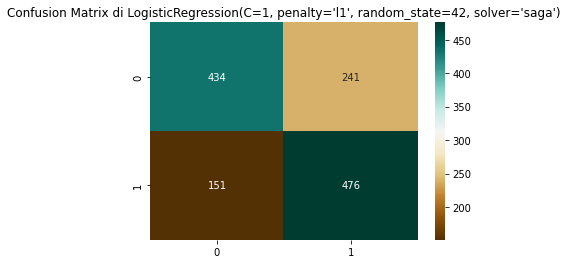

In [1453]:
model_confusion_matrix(model, X_val, y_val)

In [1454]:
dictionary_model_accuracy = { 'Logistic Regression regol.' : model_accuracy(model, X_val, y_val)}

Precision Score -> 0.6638772663877266
Recall Score -> 0.759170653907496
F1 Score -> 0.6986111111111111


In [1455]:
list_models_accuracy.append(dictionary_model_accuracy)

Da notare che la matrice di confusione rimane circa uguale

##### Alberi decisionali

In [1456]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train);

In [1457]:
grid_tree = {
    'max_depth' : [2,4,6,8,12]
}

In [1458]:
skf = StratifiedKFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid_tree, cv=skf)

In [1459]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [2, 4, 6, 8, 12]})

In [1460]:
model = gs.best_estimator_

In [1461]:
model

DecisionTreeClassifier(max_depth=4)

In [1462]:
model.score(X_val, y_val)

0.7411674347158218

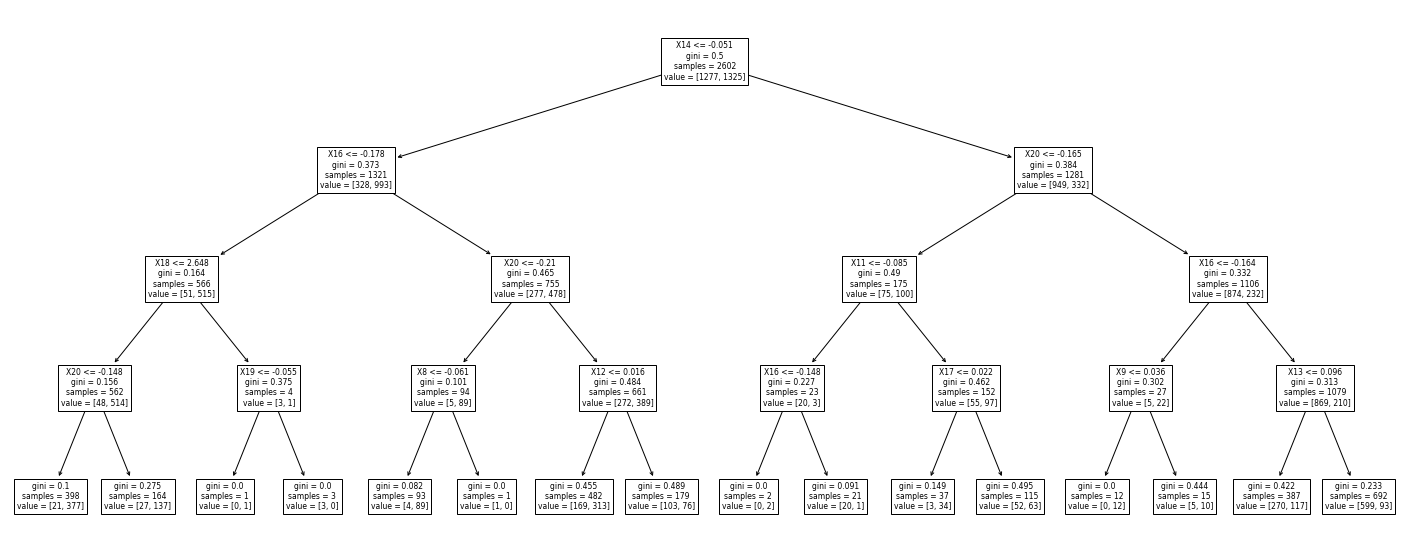

In [1463]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 10))
plot_tree(model, feature_names=X_sampled.columns.to_list());

Modello: DecisionTreeClassifier(max_depth=4)


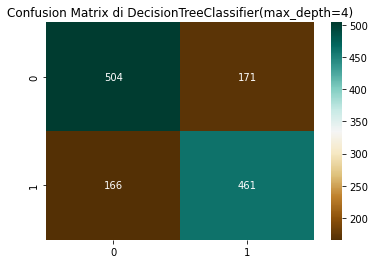

In [1464]:
model_confusion_matrix(model, X_val, y_val)

In [1465]:
dictionary_model_accuracy = { 'Decision Tree' : model_accuracy(model, X_val, y_val)}

Precision Score -> 0.7294303797468354
Recall Score -> 0.7352472089314195
F1 Score -> 0.7408848115132385


In [1466]:
list_models_accuracy.append(dictionary_model_accuracy)

In [1467]:
list_models_accuracy

[{'Perceptron': (0.7783687943262412, 0.7001594896331739, 0.7578405628911814)},
 {'Logistic Regression': (0.6643454038997214,
   0.7607655502392344,
   0.6993648703313835)},
 {'Logistic Regression regol.': (0.6638772663877266,
   0.759170653907496,
   0.6986111111111111)},
 {'Decision Tree': (0.7294303797468354,
   0.7352472089314195,
   0.7408848115132385)}]

In [1468]:
dictionary_methods['1. Undersampling'] = list_models_accuracy

### 2. Oversampling della classe meno numerosa

suddivido il dataframe iniziale nella variabile dipendente e indipendente

In [1469]:
list_models_accuracy = []

In [1470]:
X = df.drop(columns='Bankrupt')
y = df['Bankrupt']

In [1471]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

In [1472]:
X_train, X_val, y_train, y_val = train_test_split(
    X_sm, y_sm,
    test_size=1/3, 
    random_state=42
)

In [1473]:
####
mi = mutual_info_classif(X_train, y_train)

sel_ = SelectKBest(mutual_info_classif, k=30).fit(X_train, y_train)

X_train = sel_.transform(X_train)
X_val = sel_.transform(X_val)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
####

In [1474]:
print(f'Shape before SMOTE: {X.shape}')
print(f'Shape after SMOTE: {X_sm.shape}')

Shape before SMOTE: (40506, 60)
Shape after SMOTE: (77108, 60)


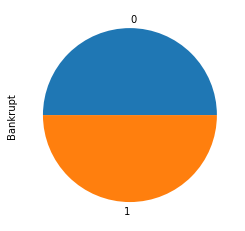

In [1475]:
y_sm.value_counts().plot.pie()

#### Perceptron

In [1476]:
model = perceptron_function(X_train, y_train)

In [1477]:
model.score(X_val, y_val)

0.6514414659767342

Modello: Perceptron(random_state=42)


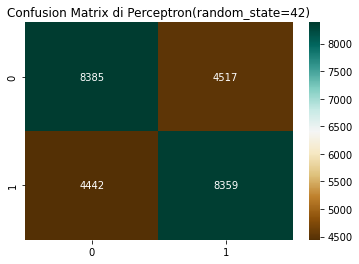

In [1478]:
model_confusion_matrix(model,X_val, y_val)

In [1479]:
dictionary_model_accuracy = { 'Perceptron' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.6491922957440199
Recall Score -> 0.6529958596984611
F1 Score -> 0.6514411093160584


#### Regressione Logistica

addestriamo il modello sui dati già satandardizzati

In [1480]:
model = logistic_regression_function(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [1481]:
model.score(X_val, y_val)

0.6837334163327238

Modello: LogisticRegression(random_state=42, solver='saga')


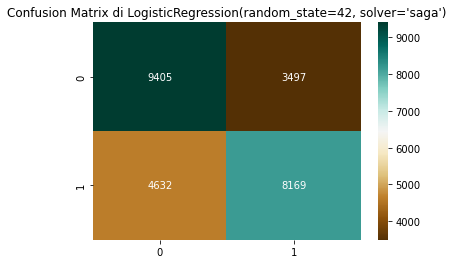

In [1482]:
model_confusion_matrix(model,X_val, y_val)

In [1483]:
dictionary_model_accuracy = { 'Logistic Regression' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.7002400137150694
Recall Score -> 0.6381532692758378
F1 Score -> 0.6830003756862333


Aggiungo la regolarizzazione

In [1484]:
grid = [
    {
        "penalty": ["l2", "l1"],
        "C": [0.1, 1, 10]
    },
    {
        "penalty": ["elasticnet"],
        "C": [0.1, 1, 10],
        "l1_ratio": [0.2, 0.5]
    }
]

In [1485]:
model = logistic_regression_function(X_train, y_train, grid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Regressione Logistica -> LogisticRegression(C=1, random_state=42, solver='saga')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [1486]:
model

LogisticRegression(C=1, random_state=42, solver='saga')

In [1487]:
model.score(X_val, y_val)

0.6837334163327238

valutazione del modello

Modello: LogisticRegression(C=1, random_state=42, solver='saga')


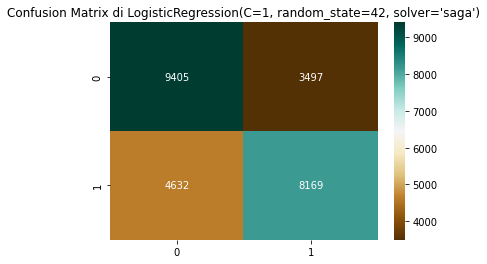

In [1488]:
model_confusion_matrix(model, X_val, y_val)

In [1489]:
dictionary_model_accuracy = { 'Logistic Regression regol.' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.7002400137150694
Recall Score -> 0.6381532692758378
F1 Score -> 0.6830003756862333


#### Alberi decisionali

In [1490]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_sm, y_sm, 
    test_size=1/3, 
    random_state=42
)

In [1491]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [1492]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train);

In [1493]:
grid_tree = {
    'max_depth' : [2,4,6,8,12,14,16,18,20,22,24]
}

In [1494]:
skf = StratifiedKFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid_tree, cv=skf)

In [1495]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [2, 4, 6, 8, 12, 14, 16, 18, 20, 22, 24]})

In [1496]:
model = gs.best_estimator_

In [1497]:
model

DecisionTreeClassifier(max_depth=22)

In [1498]:
model.score(X_val, y_val)

0.8986110570750496

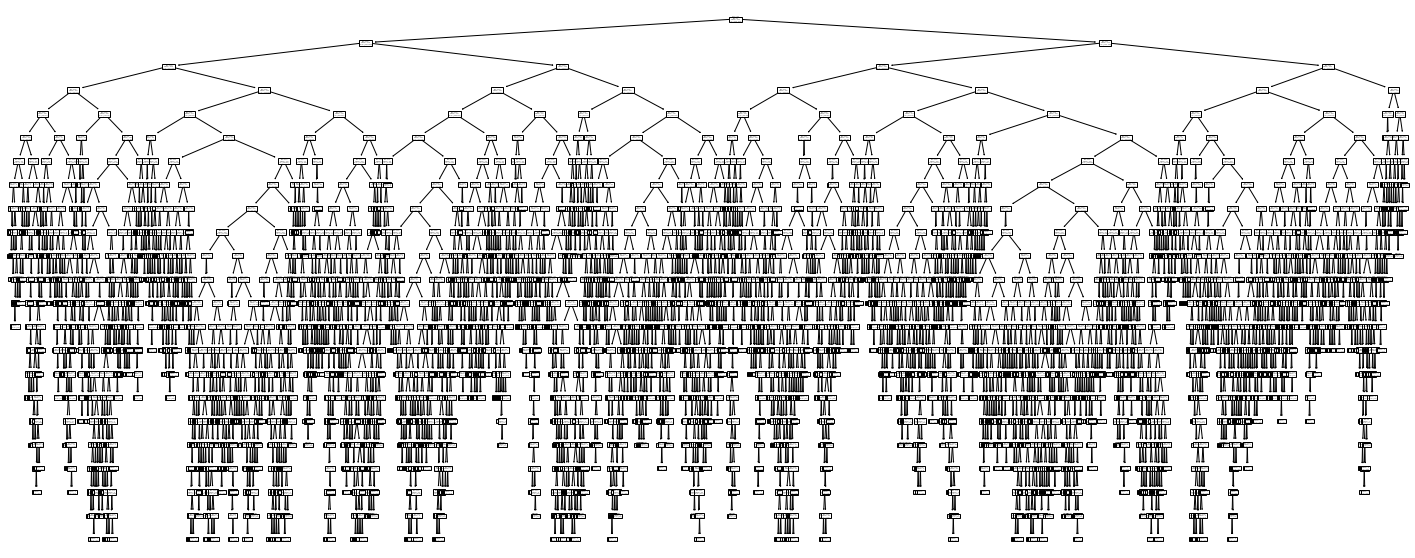

In [1499]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 10))
plot_tree(model, feature_names=X_sampled.columns.to_list());

Valutazione del modello

Modello: DecisionTreeClassifier(max_depth=22)


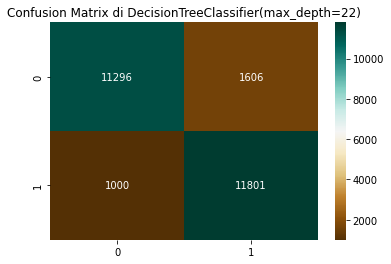

In [1500]:
model_confusion_matrix(model, X_val, y_val)

In [1501]:
dictionary_model_accuracy = { 'Decision Tree' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.8802118296412322
Recall Score -> 0.9218811030388251
F1 Score -> 0.8985719033217843


Notare che con gli alberi decisionali abbiamo ottenuto un risultato molto valido e molto migliore rispetto ai modelli precedenti

In [1502]:
dictionary_methods['2. Oversampling'] = list_models_accuracy

### 3. Aumentare il peso degli errori sulla classe meno numerosa

In [1503]:
list_models_accuracy = []

In [1504]:
X = df.drop(columns='Bankrupt')
y = df['Bankrupt']

In [1505]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=1/3,  
    random_state=42 
)

In [1506]:
####
mi = mutual_info_classif(X_train, y_train)

sel_ = SelectKBest(mutual_info_classif, k=30).fit(X_train, y_train)

X_train = sel_.transform(X_train)
X_val = sel_.transform(X_val)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
####

#### Perceptron

In [1507]:
grid_perceptron = {
    'class_weight' : [{1:i} for i in range(2,25)]
}

In [1508]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=42)

In [1509]:
skf = StratifiedKFold(3, shuffle=True, random_state=42)

In [1510]:
gs = GridSearchCV(model, grid_perceptron, cv=skf)

In [1511]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Perceptron(random_state=42),
             param_grid={'class_weight': [{1: 2}, {1: 3}, {1: 4}, {1: 5},
                                          {1: 6}, {1: 7}, {1: 8}, {1: 9},
                                          {1: 10}, {1: 11}, {1: 12}, {1: 13},
                                          {1: 14}, {1: 15}, {1: 16}, {1: 17},
                                          {1: 18}, {1: 19}, {1: 20}, {1: 21},
                                          {1: 22}, {1: 23}, {1: 24}]})

In [1512]:
model = gs.best_estimator_

In [1513]:
model

Perceptron(class_weight={1: 2}, random_state=42)

In [1514]:
model.score(X_val, y_val)

0.9188268404680788

Modello: Perceptron(class_weight={1: 2}, random_state=42)


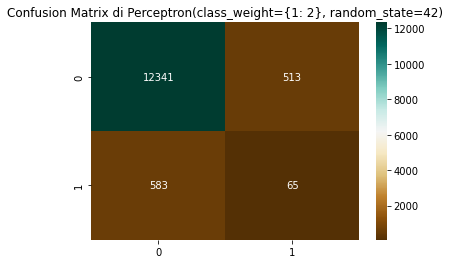

In [1515]:
model_confusion_matrix(model, X_val, y_val)

In [1516]:
dictionary_model_accuracy = { 'Perceptron' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.11245674740484429
Recall Score -> 0.10030864197530864
F1 Score -> 0.5317595071078098


#### Regressione Logistica

In [1517]:
model = logistic_regression_function(X_train, y_train, class_weight={1:15})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [1518]:
model.score(X_val, y_val)

0.8426899718560213

Modello: LogisticRegression(class_weight={1: 15}, random_state=42, solver='saga')


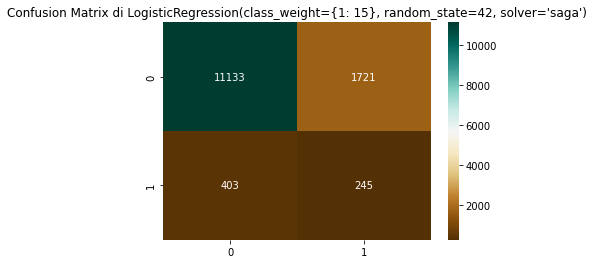

In [1519]:
model_confusion_matrix(model,X_val, y_val)

In [1520]:
dictionary_model_accuracy = { 'Logistic Regression' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.12461851475076297
Recall Score -> 0.37808641975308643
F1 Score -> 0.5501836548587369


Riuso la griglia usata in precedenza, aggiungo in più la `class_weight`

In [1521]:
grid = [
    {
        "penalty": ["l2", "l1"],
        "C": [0.1, 1, 10]
    },
    {
        "penalty": ["elasticnet"],
        "C": [0.1, 1, 10],
        "l1_ratio": [0.2, 0.5]
    }
]

In [1522]:
model = logistic_regression_function(X_train, y_train, grid, class_weight={1:20})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Regressione Logistica -> LogisticRegression(C=0.1, class_weight={1: 20}, penalty='l1', random_state=42,
                   solver='saga')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [1523]:
model

LogisticRegression(C=0.1, class_weight={1: 20}, penalty='l1', random_state=42,
                   solver='saga')

In [1524]:
model.score(X_val, y_val)

0.7112279662272256

valutazione del modello

Modello: LogisticRegression(C=0.1, class_weight={1: 20}, penalty='l1', random_state=42,
                   solver='saga')


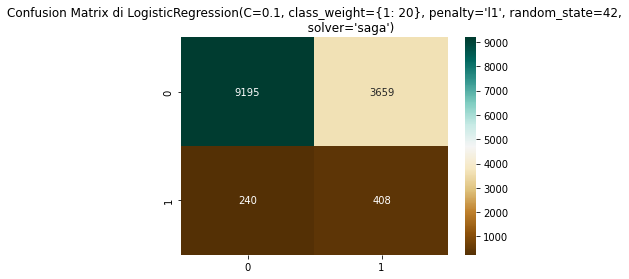

In [1525]:
model_confusion_matrix(model, X_val, y_val)

In [1526]:
dictionary_model_accuracy = { 'Logistic Regression regol.' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.10031964593066142
Recall Score -> 0.6296296296296297
F1 Score -> 0.4990676749136607


#### Albero decisionale

In [1527]:
X = df.drop(columns='Bankrupt')
y = df['Bankrupt']

In [1528]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=1/3, 
    random_state=42
)

In [1529]:
####
mi = mutual_info_classif(X_train, y_train)

sel_ = SelectKBest(mutual_info_classif, k=30).fit(X_train, y_train)

X_train = sel_.transform(X_train)
X_val = sel_.transform(X_val)

####

In [1530]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [1531]:
model = DecisionTreeClassifier(max_depth=2, class_weight={1:20})
model.fit(X_train, y_train);

In [1532]:
grid_tree = {
    'max_depth' : range(2,50)
}

In [1533]:
skf = StratifiedKFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid_tree, cv=skf)

In [1534]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={1: 20},
                                              max_depth=2),
             param_grid={'max_depth': range(2, 50)})

In [1535]:
model = gs.best_estimator_

In [1536]:
model

DecisionTreeClassifier(class_weight={1: 20}, max_depth=46)

In [1537]:
model.score(X_val, y_val)

0.9200859131980448

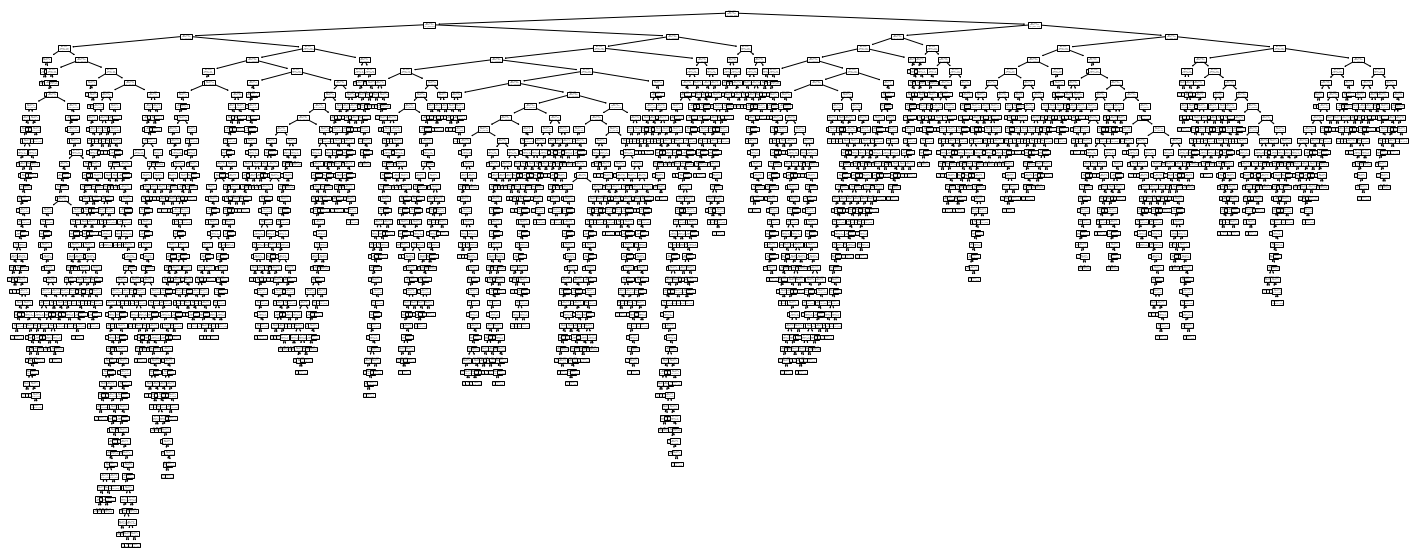

In [1538]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 10))
plot_tree(model, feature_names=X_sampled.columns.to_list());

Valutazione del modello

Modello: DecisionTreeClassifier(class_weight={1: 20}, max_depth=46)


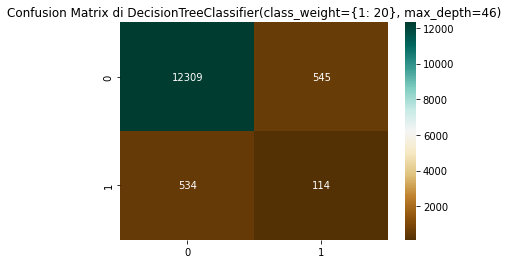

In [1539]:
model_confusion_matrix(model, X_val, y_val)

In [1540]:
dictionary_model_accuracy = { 'Decision Tree' : model_accuracy(model, X_val, y_val)}
list_models_accuracy.append(dictionary_model_accuracy)

Precision Score -> 0.17298937784522003
Recall Score -> 0.17592592592592593
F1 Score -> 0.5662279786454937


L'albero decisionale per dataset sbilanciati non offre buoni risultati

In [1541]:
dictionary_methods['3. Weighting'] = list_models_accuracy

In [1542]:
dictionary_methods

{'1. Undersampling': [{'Perceptron': (0.7783687943262412,
    0.7001594896331739,
    0.7578405628911814)},
  {'Logistic Regression': (0.6643454038997214,
    0.7607655502392344,
    0.6993648703313835)},
  {'Logistic Regression regol.': (0.6638772663877266,
    0.759170653907496,
    0.6986111111111111)},
  {'Decision Tree': (0.7294303797468354,
    0.7352472089314195,
    0.7408848115132385)}],
 '2. Oversampling': [{'Perceptron': (0.6491922957440199,
    0.6529958596984611,
    0.6514411093160584)},
  {'Logistic Regression': (0.7002400137150694,
    0.6381532692758378,
    0.6830003756862333)},
  {'Logistic Regression regol.': (0.7002400137150694,
    0.6381532692758378,
    0.6830003756862333)},
  {'Decision Tree': (0.8802118296412322,
    0.9218811030388251,
    0.8985719033217843)}],
 '3. Weighting': [{'Perceptron': (0.11245674740484429,
    0.10030864197530864,
    0.5317595071078098)},
  {'Logistic Regression': (0.12461851475076297,
    0.37808641975308643,
    0.550183654858736

### Conclusioni sulle scelte fatte

Basandoci sui risultati ottenuti notiamo che il modello migliore lo abbiamo ottenuto con oversampling della classe meno numerosa e utilizzando come modello gli alberi decisionali

Ovviamente come in qualsiasi modello di classificazione e predizione non possiamo avere l'assoluta certezza, sopprattuto se parliamo di bancarotta di società, infatti ci sono davvero tantissimi fattori che possono influire, ad esempio all'inizio abbiamo citato il z-score (indice Altman) per identificare l'azienda in un 'range' di bancarotta o meno, ma non sempre rappresenta al meglio lo stato di salute finanziario di un'azienda.

In [1543]:
list_accuracy = ['Precision Score' , 'Recall Score', 'F1 Score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


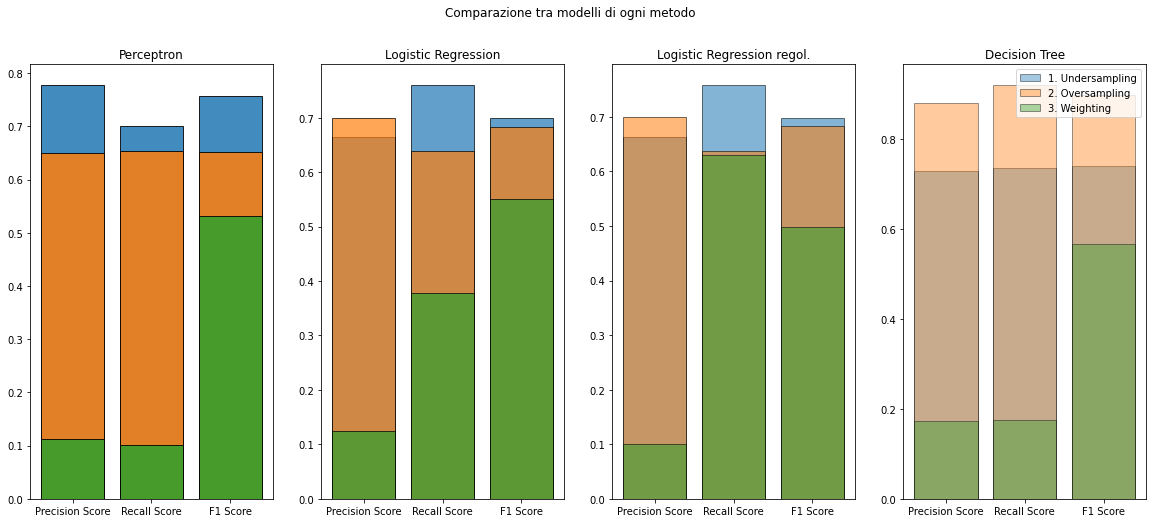

In [1544]:
plt.figure(figsize=(20,8))
i = 1
plt.suptitle('Comparazione tra modelli di ogni metodo')

for key in dictionary_methods.keys():
  #plt.figure(figsize=(20,8))
  i=1
  for l in dictionary_methods[key]:
    #print(f'key = {list(l.items())[0][0]}, values = {list(l.items())[0][1]}')
    item = list(l.items())
    #plt.set_title(item[0][0])
    #3 righe e 4 colonne
    plt.subplot(1,4,i).set_title(item[0][0])
    # aggiungo il alpha per far vedere le barre dietro 
    plt.bar(list_accuracy, item[0][1], alpha=(100-i*15)/100, edgecolor='black')
    i += 1

plt.legend(dictionary_methods.keys())

Dal grafico notiamo che il metodo migliore per un dataset con classi sbilanciate e l'oversampling (colore arancione) e il modello che riesce a identificare al meglio le classi è il decision Tree, anche il Perceptron non è male quando si ha un numero di dati bilanciato per le classi, cosi come anche la Regressione Logistica.

Per quanto riguarda pesare l'errore sulla classe sbilanciata dal grafico notiamo che i risultati sono davvero bassi, probabilmente perchè il rapporto tra il numero di elementi per classe e davvero elevato, 95% per classi 0 e ~ 5% per le classi 1 